In [30]:
import numpy as np
import networkx as nx
from data_generate import generate_random_MVN_data
from CSCS import CSCS

In [31]:
np.random.seed(3689)

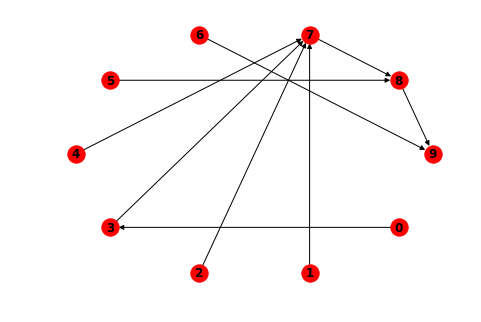

In [32]:
Y = generate_random_MVN_data(a = 2, b = 5, diag_a= 0.99, diag_b=1.01,plot = True)

In [36]:
cscs = CSCS(Y = Y,l = 8)

In [37]:
L,A,G = cscs.fit()

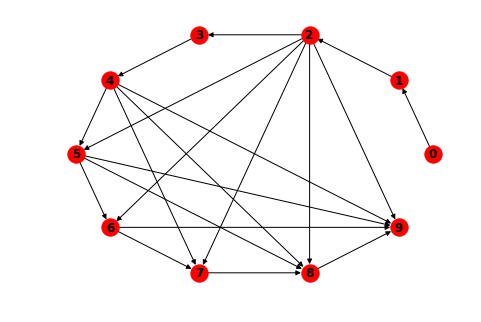

In [38]:
nx.draw_shell(G, with_labels=True, font_weight='bold')